<a href="https://colab.research.google.com/github/VDliveson/MNIST-Classifier/blob/main/MNIST_Handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## Loading the MNIST dataset

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [6]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


60000 Images

Image size : 28 X 28

Grayscale image

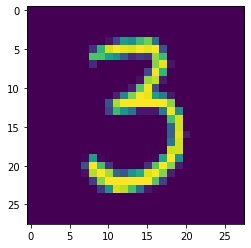

In [7]:
plt.imshow(X_train[50])

In [9]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## Scaling the values

In [10]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [12]:
X_train = X_train / 255
X_test = X_test / 255

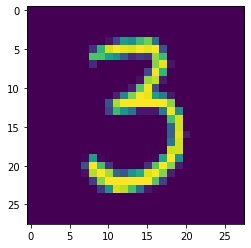

In [13]:
plt.imshow(X_train[50])

## Building the neural network

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [47]:
# Training the neural network
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1052 - accuracy: 0.6504
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4669 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3810 - accuracy: 0.8896
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3443 - accuracy: 0.9006
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3212 - accuracy: 0.9068
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3024 - accuracy: 0.9120
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2863 - accuracy: 0.9164
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2704 - accuracy: 0.9215
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9242
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.245

##  Test data accuracy

In [50]:
loss,accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.9283


In [51]:
print(loss,accuracy)

0.2407500445842743 0.9283000230789185


**Test data accuracy is 92.5 %**

In [52]:
y_pred = model.predict(X_test)
print(y_pred)

[[5.84585071e-02 2.54249499e-05 1.36397690e-01 ... 9.99576867e-01
  3.23237479e-02 6.96472526e-01]
 [6.29218042e-01 3.02717626e-01 9.99772310e-01 ... 6.13485540e-10
  6.78350866e-01 3.91297927e-09]
 [1.81504929e-05 9.92531061e-01 1.17773533e-01 ... 1.11088365e-01
  1.53762102e-01 2.37577558e-02]
 ...
 [6.58319004e-06 6.68942928e-04 6.35266304e-04 ... 4.61707711e-02
  5.30064702e-01 9.77280140e-01]
 [3.01173329e-03 7.73526430e-02 1.86344981e-03 ... 1.27291742e-05
  8.96301985e-01 1.13912523e-02]
 [6.80457950e-01 3.27765942e-04 8.38777602e-01 ... 6.43314081e-07
  1.10151142e-01 1.62333250e-04]]


In [54]:
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)
print(y_test[0])

7
7


In [55]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 9, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 5, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 5, 4, 2, 0, 7, 1, 1, 2, 1, 

## Confusion matrix

In [56]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

Text(0.5, 42.0, 'Predicted Labels')

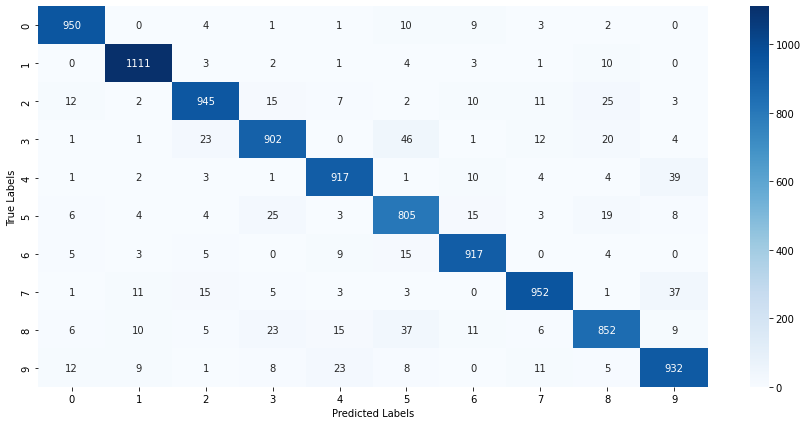

In [57]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

## Building a predictive system

In [63]:
def make_prediction(path):
  image = cv.imread(path)
  cv2_imshow(image)
  img_grayscale = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
  input_image_resize = cv.resize(img_grayscale, (28, 28))
  input_image_resize = input_image_resize/255
  image_reshaped = np.reshape(input_image_resize, [1,28,28])
  input_prediction = model.predict(image_reshaped)
  input_pred_label = np.argmax(input_prediction)
  print('The Handwritten Digit is recognised as ', input_pred_label)

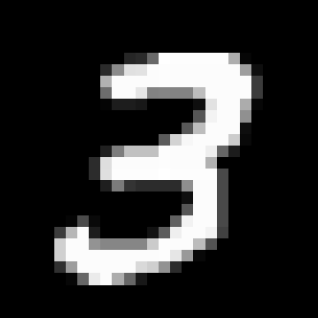

The Handwritten Digit is recognised as  3


In [64]:
make_prediction('num.png')